In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

In [52]:
df = pd.read_csv("C:/박규영/경남공모전/본선자료/07_29_병원전처리_규영.csv", encoding='cp949')

### 1. 행정동별 의료기관 개수 집계

In [53]:
name = ['여성', '교도', '정신', '요양','해군','아동','소아','어린이','키즈']
len(df[df['요양기관명'].str.contains('|'.join(name))])

79

In [54]:
df = df[~df['요양기관명'].str.contains('|'.join(name))]

In [170]:
dong_df = df.groupby('행정동')['요양기관명'].size().reset_index(name='요양기관수').sort_values(by='요양기관수', ascending=False)

### 2. 행정동별 평균 의사수

In [68]:
print('창원시 평균 총의사수:',df['총의사수'].describe()[1])

창원시 평균 총의사수: 2.10267471958585


In [73]:
df['종별코드명'].value_counts()

의원       481
치과의원     327
한의원      272
병원        36
보건지소      10
종합병원       9
한방병원       8
치과병원       7
보건진료소      5
보건소        3
상급종합       1
Name: 종별코드명, dtype: int64

In [75]:
# '종별코드명' 컬럼의 카테고리별 기초통계량을 확인합니다
grouped_statistics = df.groupby('종별코드명')['총의사수'].describe()
grouped_statistics.sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
종별코드명,,,,,,,,
의원,481.0,1.297297,0.985823,0.0,1.00,1.0,1.00,13.0
치과의원,327.0,1.192661,0.671192,0.0,1.00,1.0,1.00,9.0
한의원,272.0,1.117647,0.365663,1.0,1.00,1.0,1.00,3.0
병원,36.0,5.611111,3.227363,1.0,3.75,5.5,7.00,17.0
보건지소,10.0,0.900000,0.875595,0.0,0.00,1.0,1.75,2.0
종합병원,9.0,57.777778,55.549027,15.0,21.00,30.0,97.00,177.0
한방병원,8.0,5.625000,2.445842,3.0,4.00,5.5,6.00,11.0
치과병원,7.0,4.285714,1.704336,3.0,3.00,3.0,5.50,7.0
보건진료소,5.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


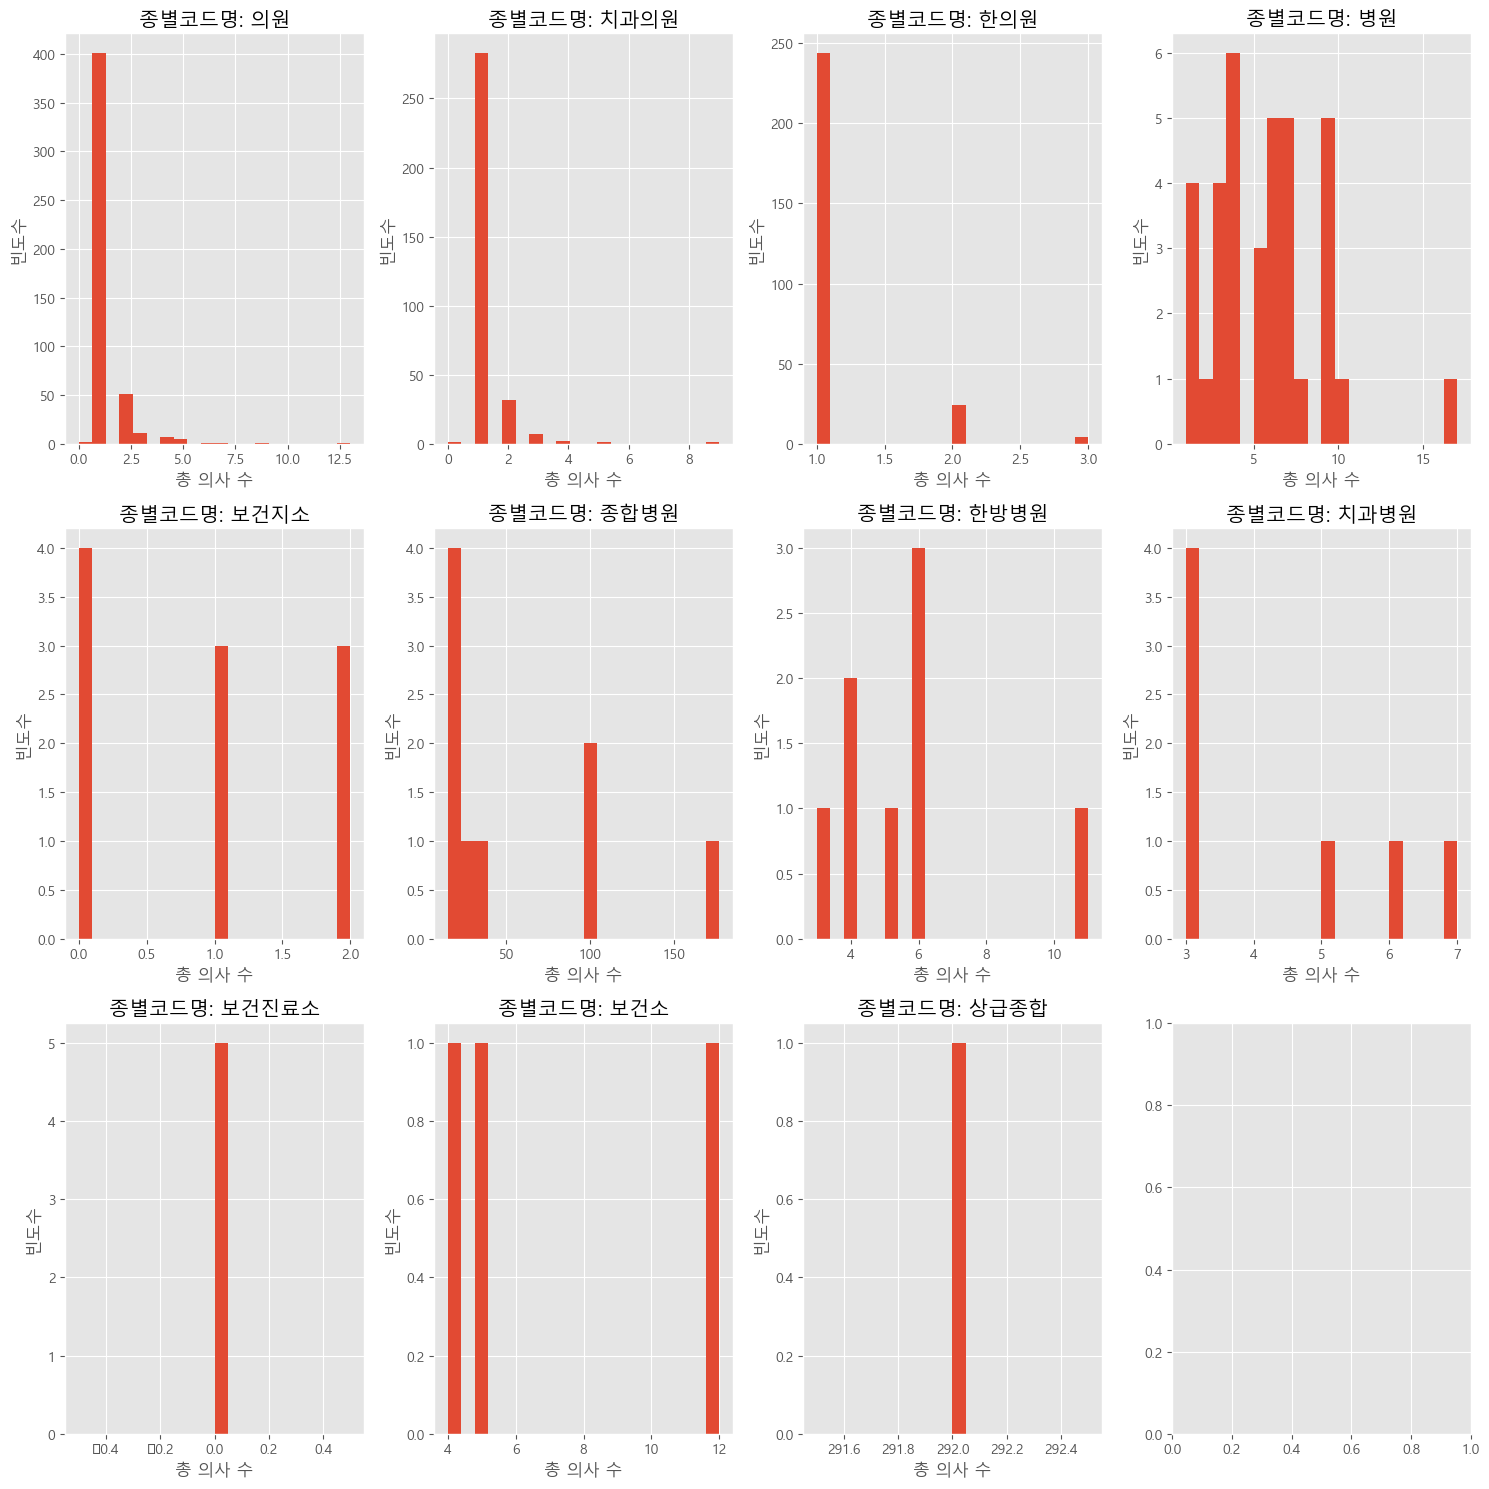

In [81]:
# 히스토그램 그리기

num_categories = len(grouped_statistics_sorted)
num_cols = 4  # 원하는 열의 수 (예: 3)
num_rows = (num_categories - 1) // num_cols + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

for i, (category, data) in enumerate(grouped_statistics_sorted.iterrows()):
    ax = axes[i // num_cols, i % num_cols]
    df[df['종별코드명'] == category]['총의사수'].plot(kind='hist', bins=20, ax=ax)
    ax.set_title(f'종별코드명: {category}')
    ax.set_xlabel('총 의사 수')
    ax.set_ylabel('빈도수')

plt.tight_layout()
plt.show();

In [143]:
df[df['총의사수'] >= 30]

,요양기관명,종별코드명,시군구코드명,읍면동,우편번호,주소,총의사수,의과일반의 인원수,좌표(X),좌표(Y),행정동,병원 간 평균거리
0,근로복지공단 창원병원,종합병원,창원성산구,중앙동,51524,경상남도 창원시 성산구 창원대로 721 (중앙동),30,2,128.671751,35.218754,중앙동,0.061776
2,창원경상국립대학교병원,종합병원,창원성산구,성주동,51472,"경상남도 창원시 성산구 삼정자로 11 (성주동, 창원경상대학교병원)",177,0,128.707846,35.199087,성주동,0.013126
564,학교법인성균관대학삼성창원병원,상급종합,창원마산회원구,합성동,51353,"경상남도 창원시 마산회원구 팔용로 158-158 (합성동, 삼성창원병원)",292,1,128.592025,35.242877,석전동,0.006254
565,재단법인대구포교성베네딕도수녀회창원파티마병원,종합병원,창원의창구,명서동,51394,경상남도 창원시 의창구 창이대로 45-45 (명서동),101,0,128.645913,35.237293,명곡동,0.00944
566,창원한마음병원,종합병원,창원의창구,사림동,51139,경상남도 창원시 의창구 용동로57번길 8 (사림동),97,0,128.699059,35.237980,봉림동,0.016741
1142,의료법인합포의료재단에스엠지연세병원,종합병원,창원마산합포구,월남동2가,51740,"경상남도 창원시 마산합포구 3·15대로 76 (월남동2가, 합포의료재단)",36,1,128.561601,35.186315,문화동,0.002732


- 원래 30명 이상 병원을 대형병원으로 분류해 칼럼으로 넣고자 했지만, 6개밖에 없음
- 대체 자료로 종별코드명별 (의료기관 종류별) 개수로 대체함

In [133]:
hospital_counts = df.groupby(['행정동', '종별코드명']).size().reset_index(name='병원 개수')
hospital_counts

,행정동,종별코드명,병원 개수
0,가음정동,의원,7
1,가음정동,치과의원,5
2,가음정동,한의원,4
3,가포동,병원,1
4,경화동,의원,5
...,...,...,...
173,회성동,치과의원,1
174,회성동,한의원,1
175,회원2동,의원,15
176,회원2동,치과의원,6


In [163]:
hospital_counts = df.groupby(['행정동', '종별코드명']).size().unstack(fill_value=0).reset_index()

In [171]:
dong_df = pd.merge(dong_df, hospital_counts, on = '행정동')
dong_df.rename(columns={'요양기관수': '병원수'}, inplace=True)

In [173]:
dong_df.head()

,행정동,병원수,병원,보건소,보건지소,보건진료소,상급종합,의원,종합병원,치과병원,치과의원,한방병원,한의원
0,상남동,147,3,0,0,0,0,62,0,1,40,4,37
1,석전동,93,5,0,0,0,1,50,0,1,21,1,14
2,중앙동,57,4,0,1,0,0,17,3,1,19,0,12
3,오동동,57,3,0,0,0,0,23,0,0,17,0,14
4,팔룡동,55,3,0,0,0,0,24,0,0,16,1,11


### 3. 병원간 평균거리

In [104]:
# 특정 행정동 내에서 요양기관 간의 거리를 계산하는 함수

def calculate_distances(df, dong):
    sub_df = df[df['행정동'] == dong]
    num_dongs = len(sub_df)
    distances = np.zeros((num_dongs, num_dongs))

    for i in range(num_dongs):
        for j in range(i + 1, num_dongs):
            x1, y1 = sub_df.iloc[i]['좌표(X)'], sub_df.iloc[i]['좌표(Y)']
            x2, y2 = sub_df.iloc[j]['좌표(X)'], sub_df.iloc[j]['좌표(Y)']
            distances[i, j] = distances[j, i] = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

    distances_df = pd.DataFrame(distances, index=sub_df['요양기관명'], columns=sub_df['요양기관명'])
    return distances_df

In [105]:
# 각 행정동 별로 거리 데이터프레임을 딕셔너리에 저장

unique_dongs = df['행정동'].unique()
distance_dfs_dict = {}

for dongs in unique_dongs:
    distances_within_dong = calculate_distances(df, dongs)
    distance_dfs_dict[dongs] = distances_within_dong

In [106]:
# 딕셔너리의 각 값들을 출력하여 확인

for dongs, distances_df in distance_dfs_dict.items():
    print(f"행정동 '{dongs}' 내 요양기관 간의 거리:\n{distances_df}\n")

행정동 '중앙동' 내 요양기관 간의 거리:
요양기관명                근로복지공단 창원병원      구트병원  의료법인염광의료재단세광병원  더고운성형외과의원  \
요양기관명                                                                   
근로복지공단 창원병원             0.000000  0.011442        0.069929   0.011483   
구트병원                    0.011442  0.000000        0.080520   0.001811   
의료법인염광의료재단세광병원          0.069929  0.080520        0.000000   0.079804   
더고운성형외과의원               0.011483  0.001811        0.079804   0.000000   
더모젤의원                   0.011483  0.001811        0.079804   0.000000   
새미래정형외과의원               0.011442  0.000000        0.080520   0.001811   
서울성모정형외과의원              0.011483  0.001811        0.079804   0.000000   
인구보건복지협회경남지회 가족보건의원     0.009681  0.001771        0.078939   0.002591   
정내과의원                   0.008735  0.003916        0.076806   0.003023   
정용근내과의원                 0.011483  0.001811        0.079804   0.000000   
터직업환경의학과의원              0.003848  0.009069        0.071470   0.008609   
화인치과병원                  0.0

In [123]:
# 각 행정동 별로 요양기관 간의 평균 거리 구하기

average_distances_dict = {}
dong_df['병원 간 평균거리'] = ''

for dongs, distances_df in distance_dfs_dict.items():
    average_distances = distances_df.mean()
    average_distances_dict[dongs] = average_distances

In [174]:
# 평균 거리를 df 데이터프레임에 추가하기

for dongs, avg_distances in average_distances_dict.items():
    dong_df.loc[dong_df['행정동'] == dongs, '병원 간 평균거리'] = avg_distances.mean()

In [175]:
dong_df.sort_values(by='병원 간 평균거리',ascending=False)

,행정동,병원수,병원,보건소,보건지소,보건진료소,상급종합,의원,종합병원,치과병원,치과의원,한방병원,한의원,병원 간 평균거리
2,중앙동,57,4,0,1,0,0,17,3,1,19,0,12,0.061776
39,진전면,4,0,0,1,2,0,0,0,0,0,1,0,0.047240
17,웅동1동,24,1,0,0,0,0,9,0,0,8,0,6,0.034700
19,북면,21,0,0,1,1,0,7,0,0,7,0,5,0.023017
31,웅남동,9,1,0,0,0,0,4,0,0,3,0,1,0.021781
4,팔룡동,55,3,0,0,0,0,24,0,0,16,1,11,0.020559
11,웅동2동,34,4,0,0,0,0,12,0,0,10,0,8,0.020365
8,봉림동,42,2,0,0,0,0,17,1,0,12,1,9,0.016741
6,내서읍,51,0,0,1,0,0,23,1,0,15,0,11,0.016233
29,동읍,13,0,0,1,1,0,5,0,0,3,0,3,0.016156


In [180]:
dong_df.to_csv('병원수_07.31기준.csv',encoding='cp949',index=False)